# Problem Statement 1(Walmart):
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.
Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

Feature Name == Description:

1.Store = Store number
2.Date= Week of Sales
3.Weekly_Sales= Sales for the given store in that week
4.Holiday_Flag =If it is a holiday week
5.Temperature =Temperature on the day of the sale
6.Fuel_Price= Cost of the fuel in the region
7.CPI =Consumer Price Index
8.Unemployment= Unemployment Rate

1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Capstone Project/Walmart (1).csv')

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Change date column's datatype
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## EDA

In [ ]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
#Checking null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

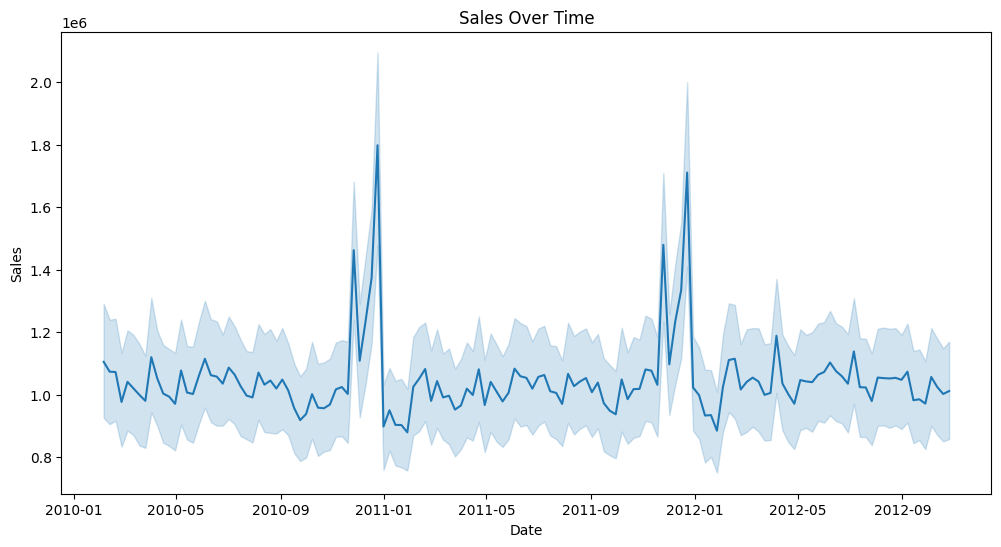

In [ ]:
#Plot the sales over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Weekly_Sales',data=data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

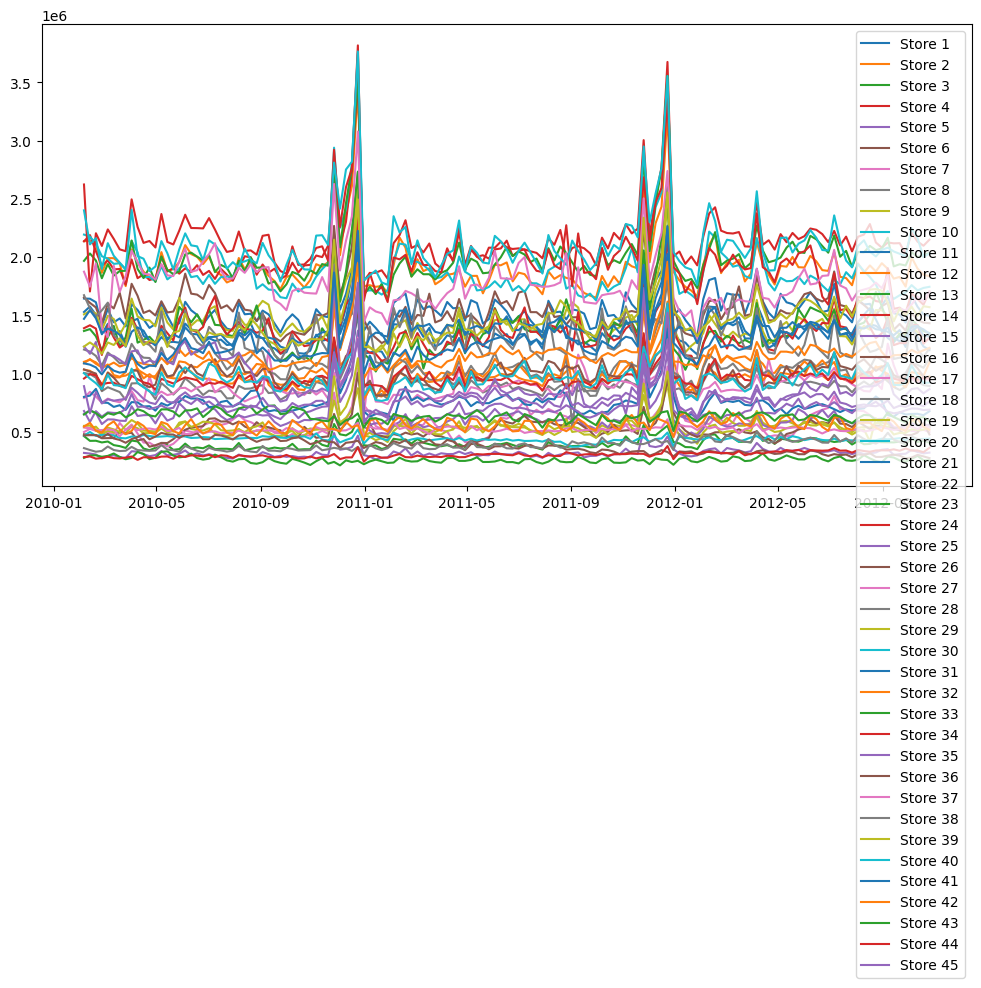

In [ ]:
# Visualize sales trends over time
plt.figure(figsize=(12, 6))
for store in data['Store'].unique():
    store_data = data[data['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')
plt.legend()
plt.show()



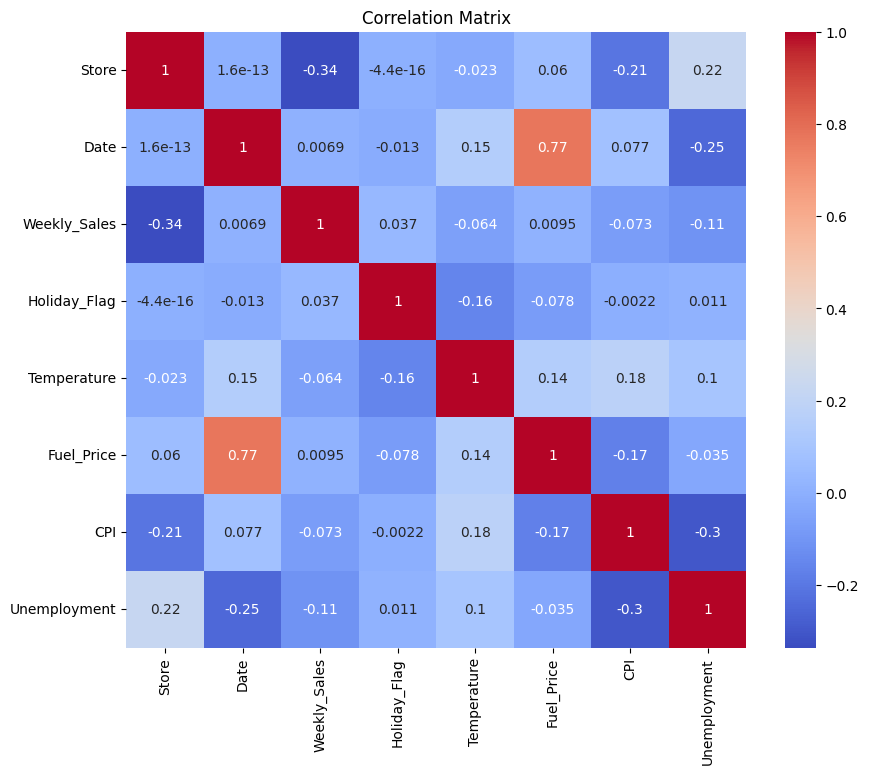

In [ ]:
#Check correlation between variables
 ##(Measeures the strength and direction of a linear relationship between two variables)
correlation=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [ ]:
#Extract features from 'Date' column
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['Day_of_Week']=data['Date'].dt.dayofweek

In [ ]:
#Drop the original 'Date' column
data.drop('Date',axis=1,inplace=True)

In [ ]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,4


# Insights Generation

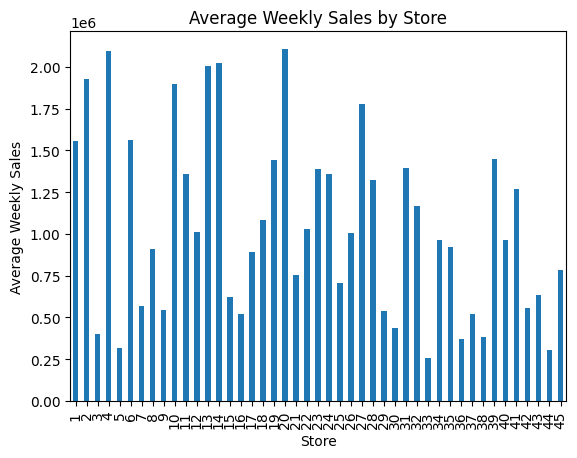

In [ ]:
# Average sales by store
avg_sales = data.groupby('Store')['Weekly_Sales'].mean()
avg_sales.plot(kind='bar')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.show()




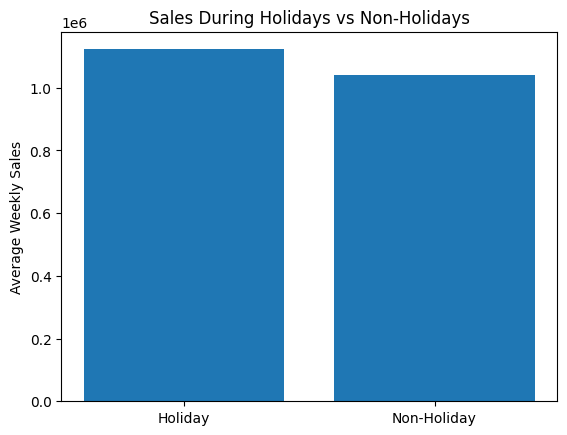

In [ ]:
# Sales during holidays vs non-holidays
holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
non_holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
plt.bar(['Holiday', 'Non-Holiday'], [holiday_sales, non_holiday_sales])
plt.ylabel('Average Weekly Sales')
plt.title('Sales During Holidays vs Non-Holidays')
plt.show()

In [ ]:
#Model Building
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [ ]:
x.shape

(6435, 10)

In [ ]:
y.shape

(6435,)

In [ ]:
#Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Rain Forest

In [ ]:
#Initialize and train the model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [ ]:
#Predict on the test set
y_pred=model.predict(x_test)

In [ ]:
#Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 58052.07357529137


In [ ]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_Week'],
      dtype='object')

In [ ]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,4


## Sales Forecasting

### 1.Using Rainforest model:

In [ ]:
# Assuming we have a DataFrame 'future_data' with future dates and other features

# Example of future data for the next 12 weeks
future_dates = pd.date_range(start='2024-08-01', periods=12, freq='W')
future_data = pd.DataFrame({
    'Date': future_dates,
    'Store': 1,
    'Holiday_Flag': 0,
    'Temperature': np.random.uniform(50, 80, 12),
    'Fuel_Price': np.random.uniform(2.5, 3.5, 12),
    'CPI': np.random.uniform(200, 220, 12),
    'Unemployment': np.random.uniform(5, 7, 12)
})

# Extract features from 'Date' column
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
future_data['Day'] = future_data['Date'].dt.isocalendar().week
future_data['Day_of_Week'] = future_data['Date'].dt.dayofweek

# Drop the original 'Date' column
future_data.drop('Date', axis=1, inplace=True)

# Predict future sales
future_sales = model.predict(future_data)
print(future_sales)

[1430449.7863 1427371.81   1427362.3795 1423730.1289 1469897.3972
 1470263.5134 1423206.504  1426417.5394 1417558.8684 1453556.3977
 1428131.6704 1430836.9802]


###2. ARIMA model

In [ ]:
data['Date']=pd.to_datetime(data[['Year','Month','Day']])

In [ ]:
# Create a dictionary for each store's sales data
store_sales = {store: data[data['Store'] == store].set_index('Date')['Weekly_Sales'] for store in data['Store'].unique()}

# Check the data for one store
print(store_sales[1].head())


Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64


In [ ]:
# Build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

forecasts={}
for store,sales in store_sales.items():
  model=ARIMA(sales,order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=12)
  forecasts[store]=forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [ ]:
print(forecasts[1])

2012-11-02    1.538713e+06
2012-11-09    1.556450e+06
2012-11-16    1.563433e+06
2012-11-23    1.566182e+06
2012-11-30    1.567265e+06
2012-12-07    1.567691e+06
2012-12-14    1.567859e+06
2012-12-21    1.567925e+06
2012-12-28    1.567951e+06
2013-01-04    1.567961e+06
2013-01-11    1.567965e+06
2013-01-18    1.567966e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [ ]:
# Print forecast for one store in a more readable format
print(forecasts[1].apply(lambda x: f'{x:,.2f}'))


2012-11-02    1,538,712.67
2012-11-09    1,556,449.93
2012-11-16    1,563,433.05
2012-11-23    1,566,182.30
2012-11-30    1,567,264.67
2012-12-07    1,567,690.80
2012-12-14    1,567,858.56
2012-12-21    1,567,924.61
2012-12-28    1,567,950.61
2013-01-04    1,567,960.85
2013-01-11    1,567,964.88
2013-01-18    1,567,966.47
Freq: W-FRI, Name: predicted_mean, dtype: object


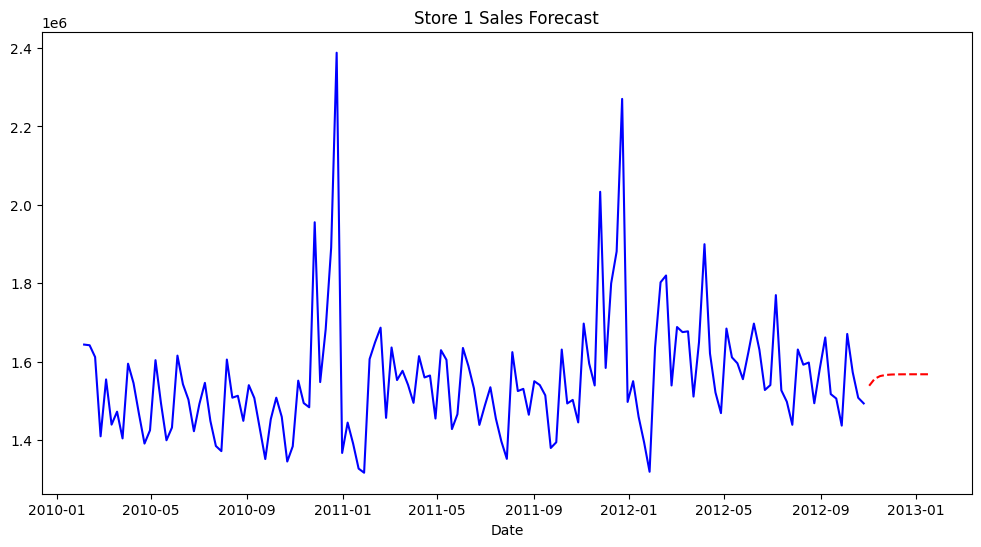

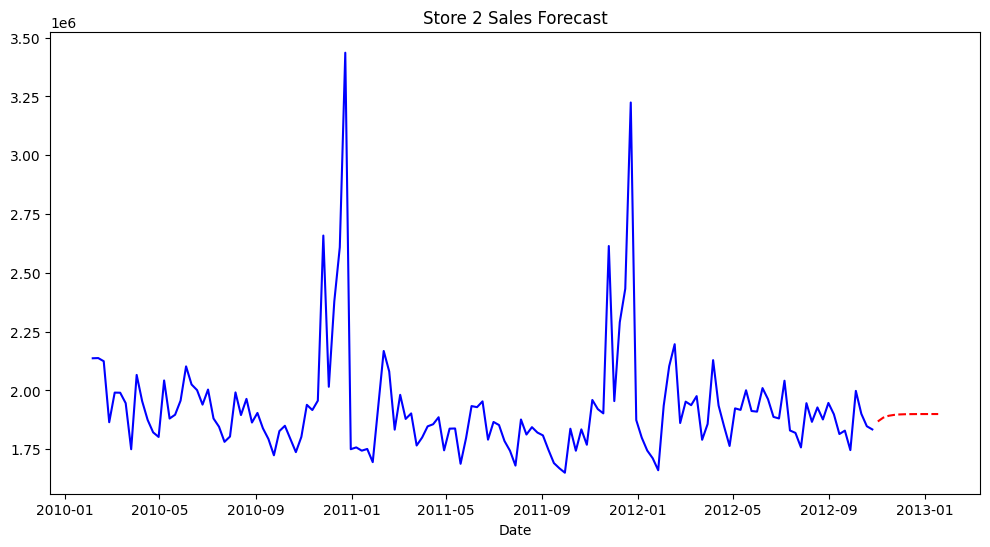

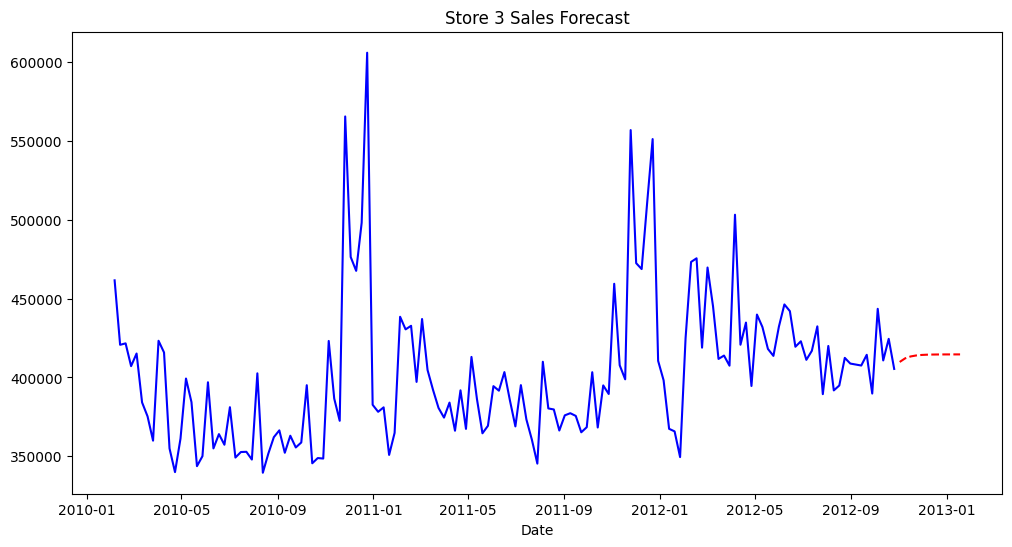

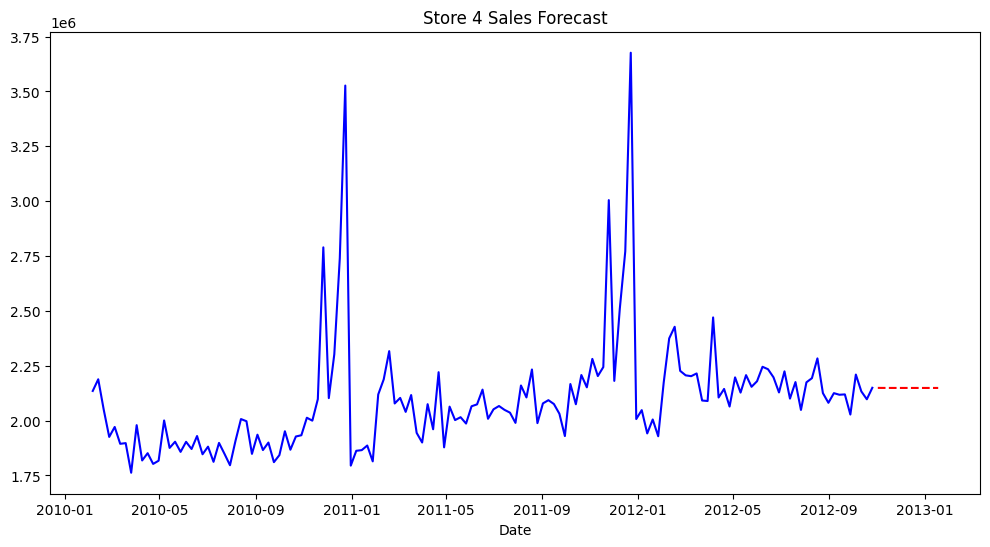

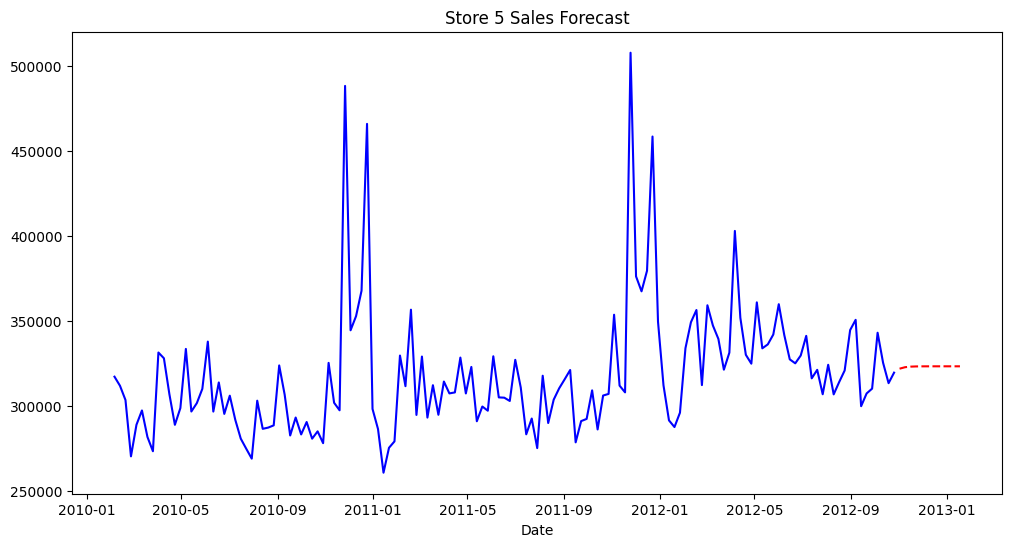

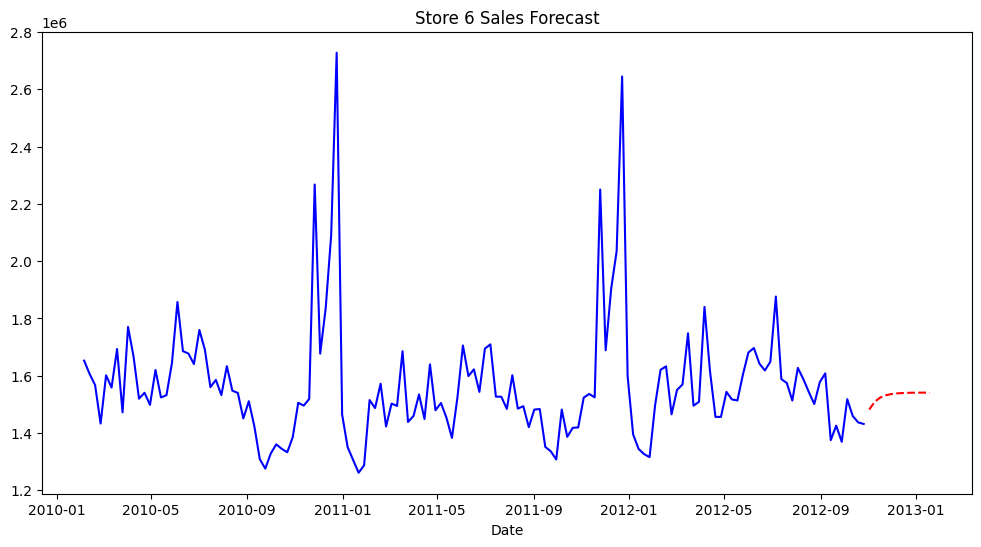

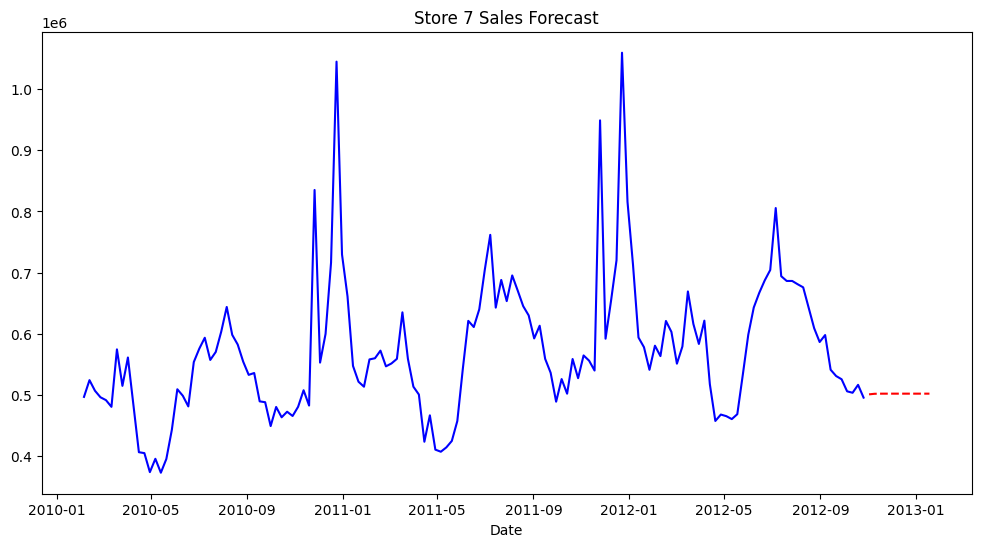

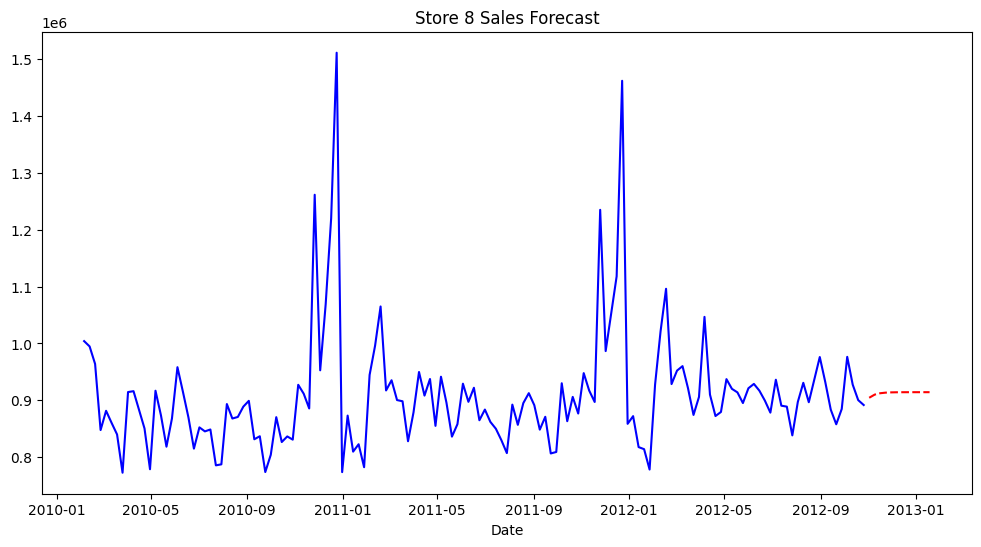

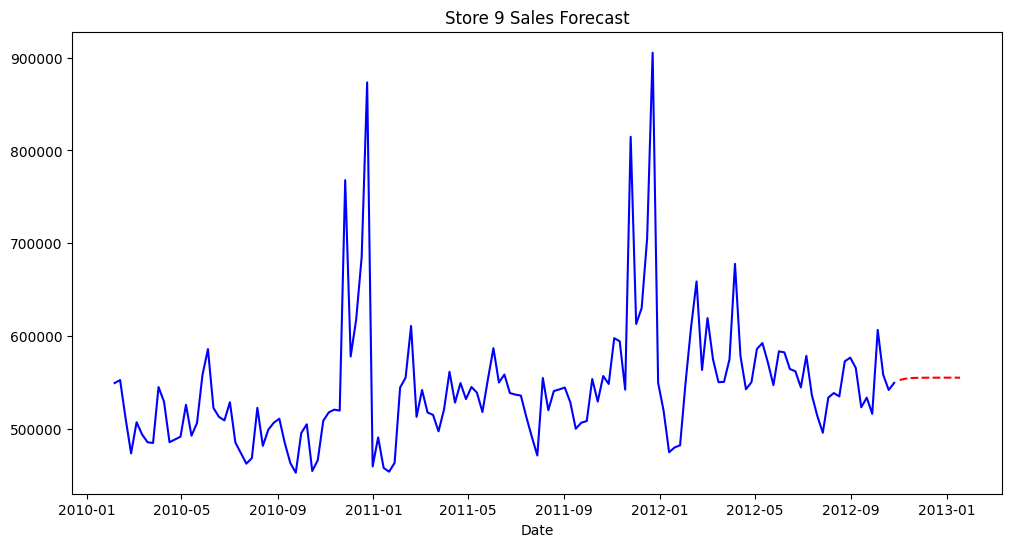

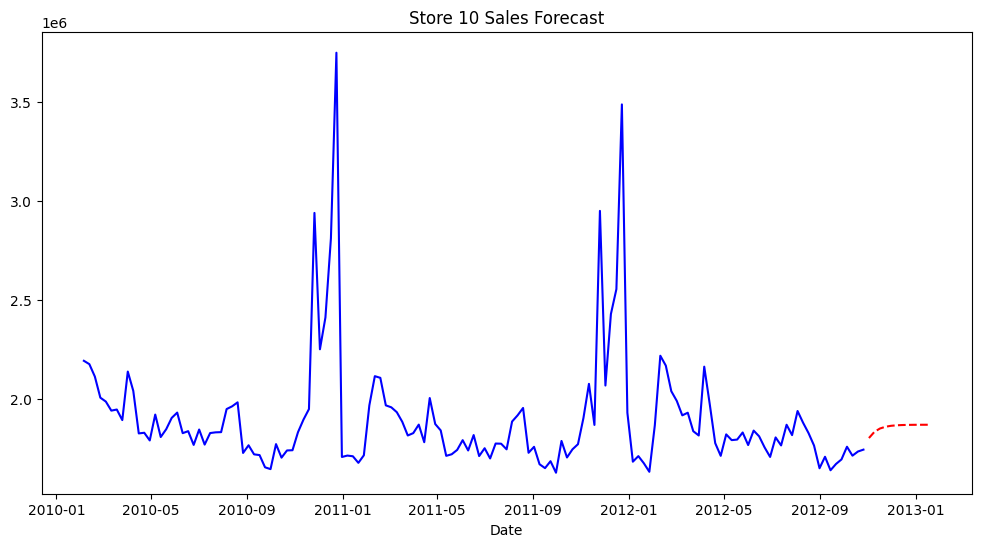

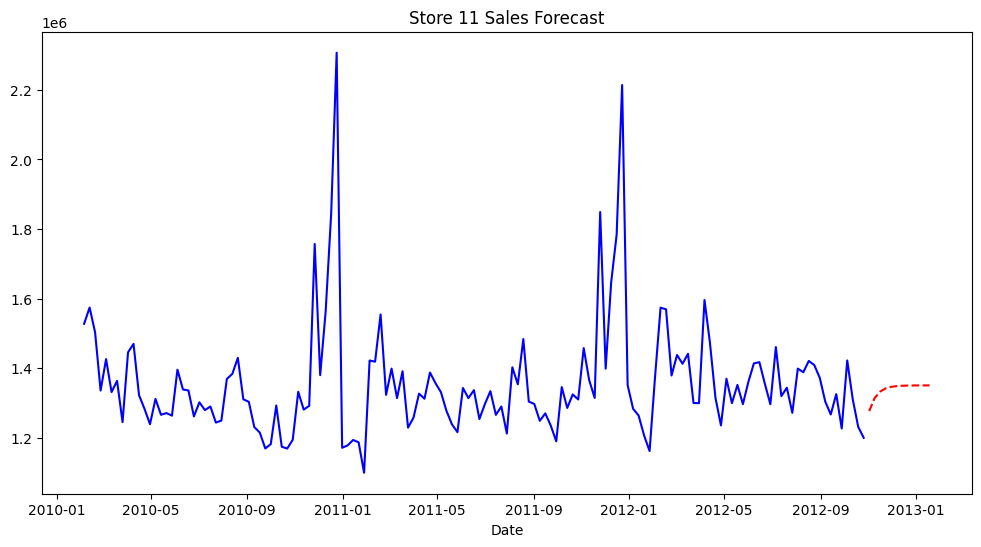

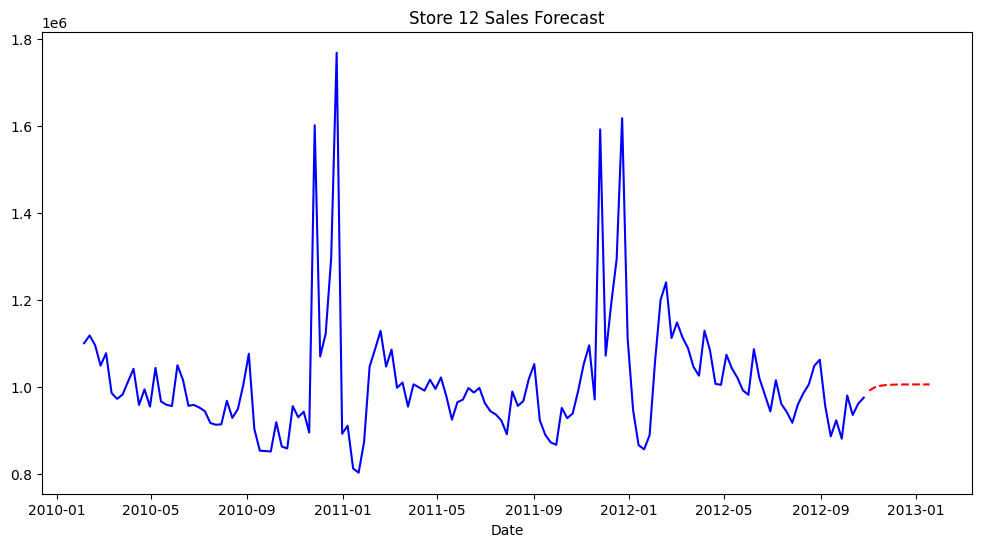

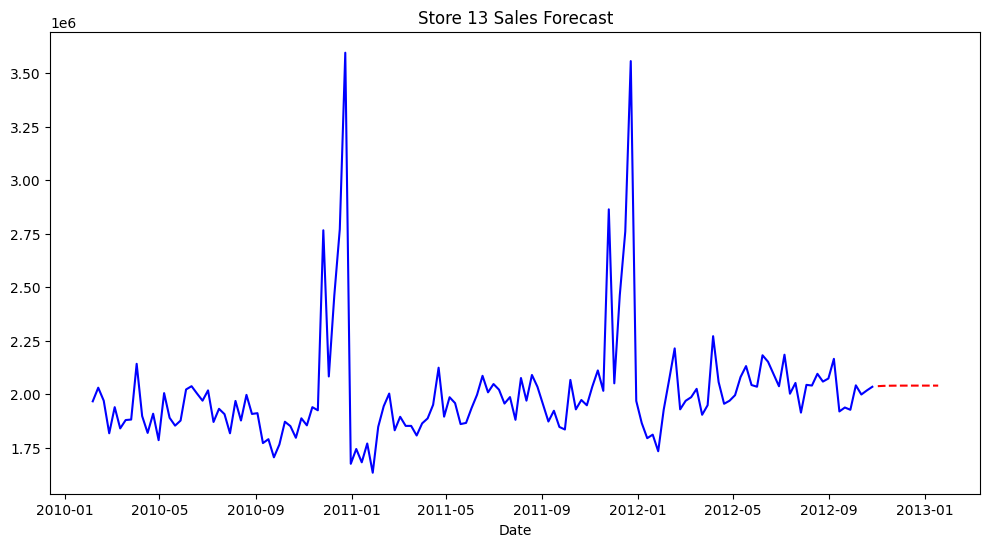

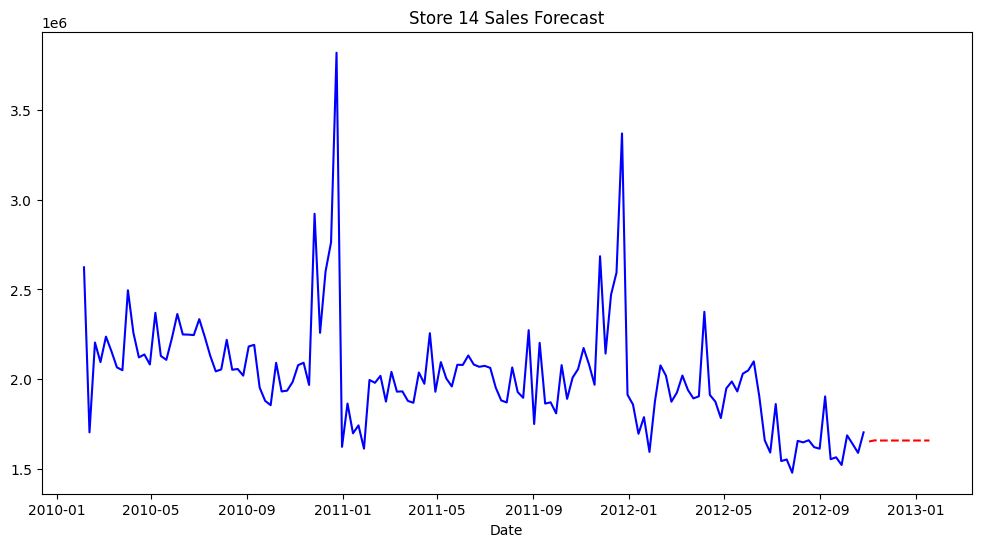

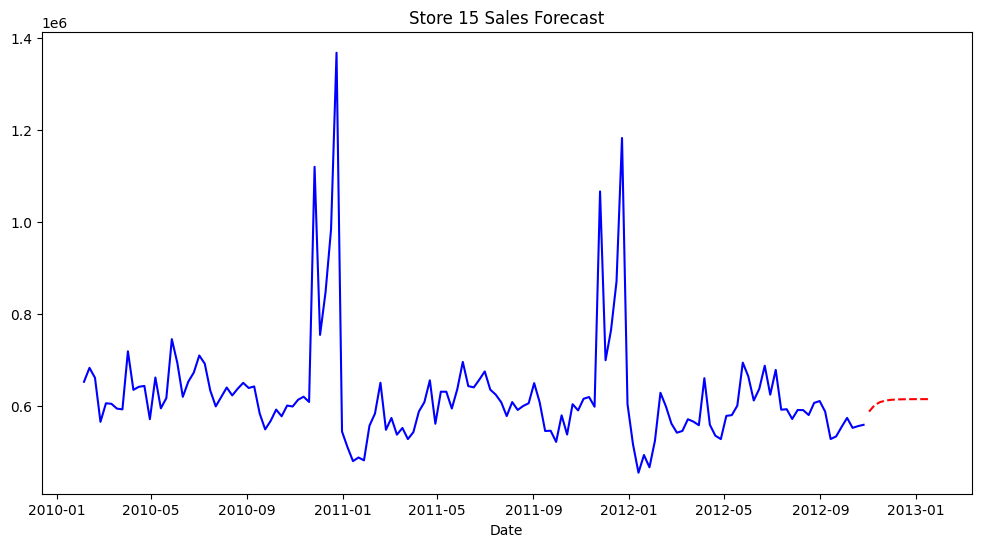

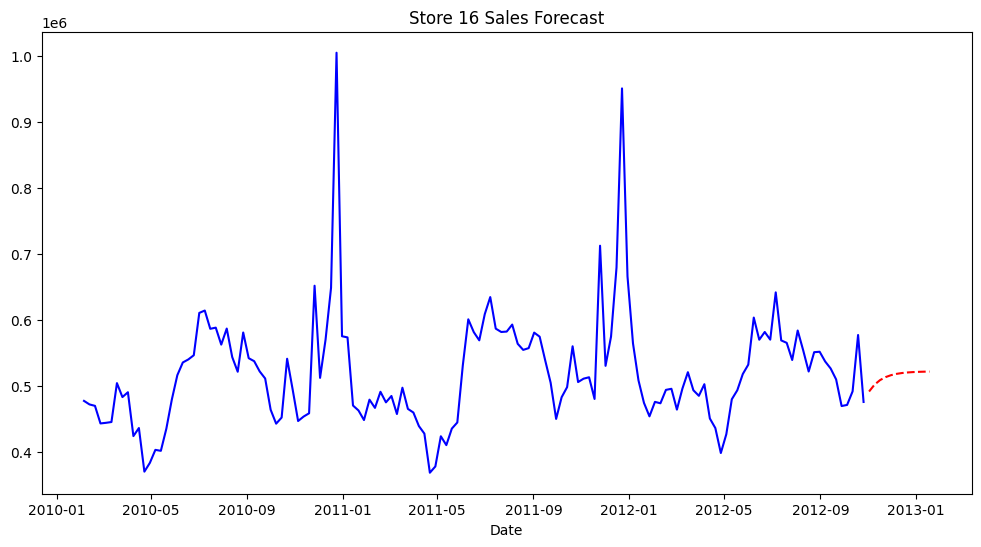

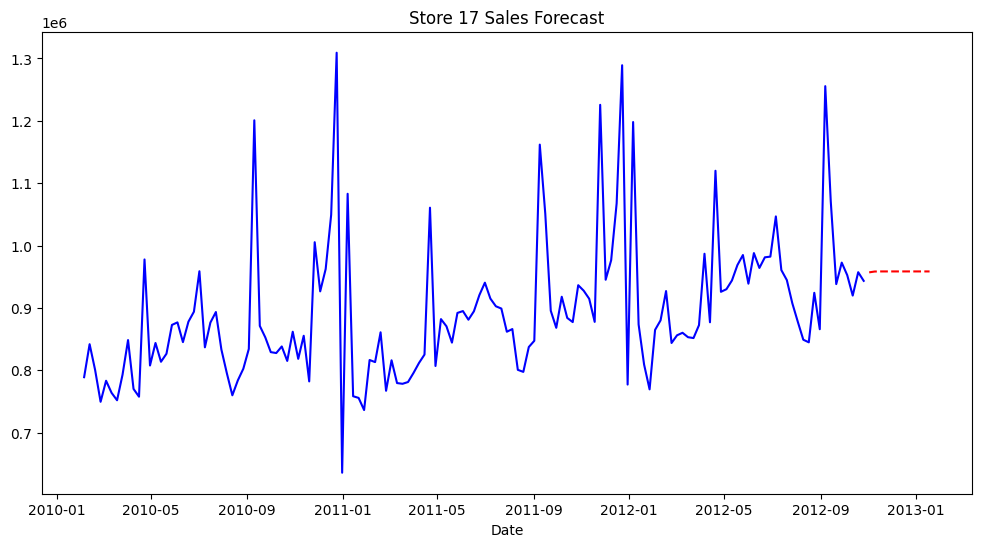

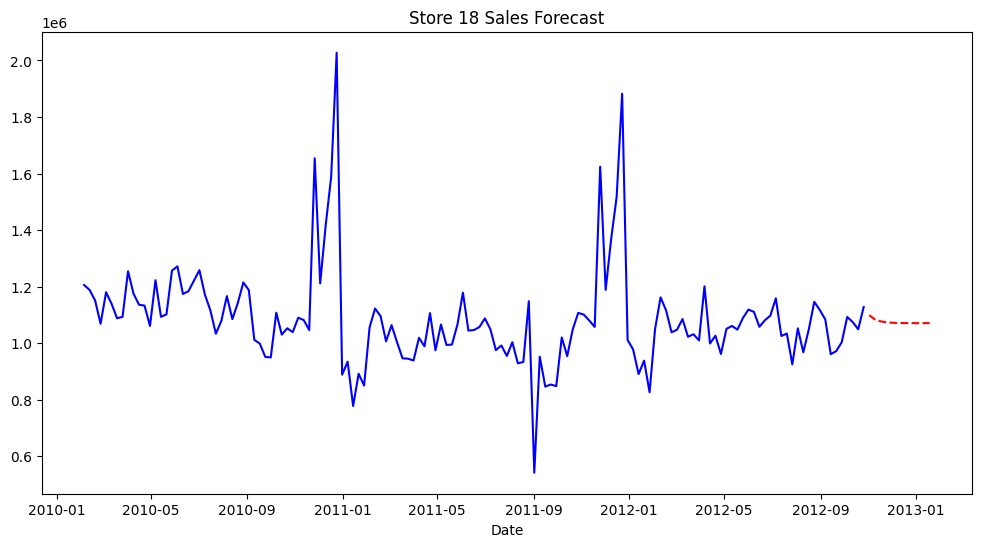

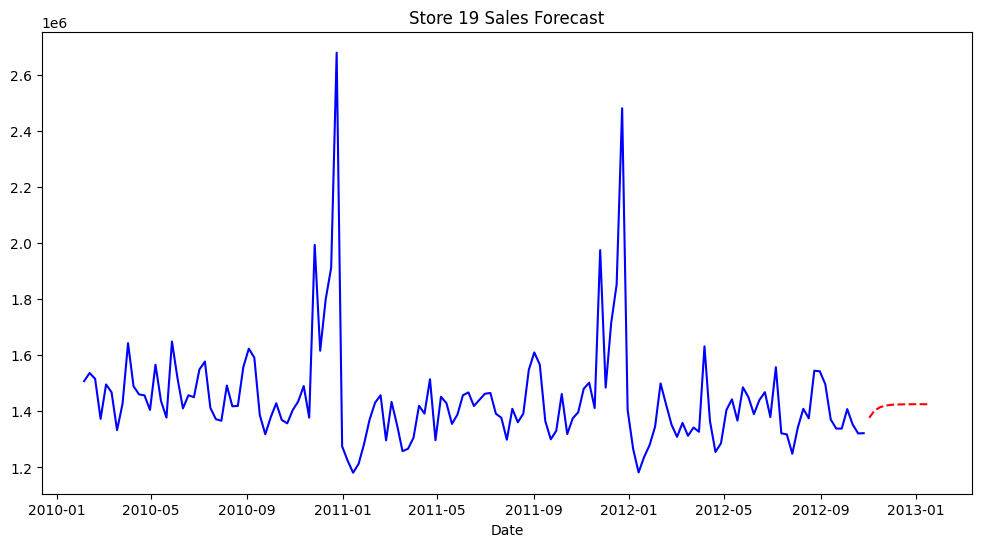

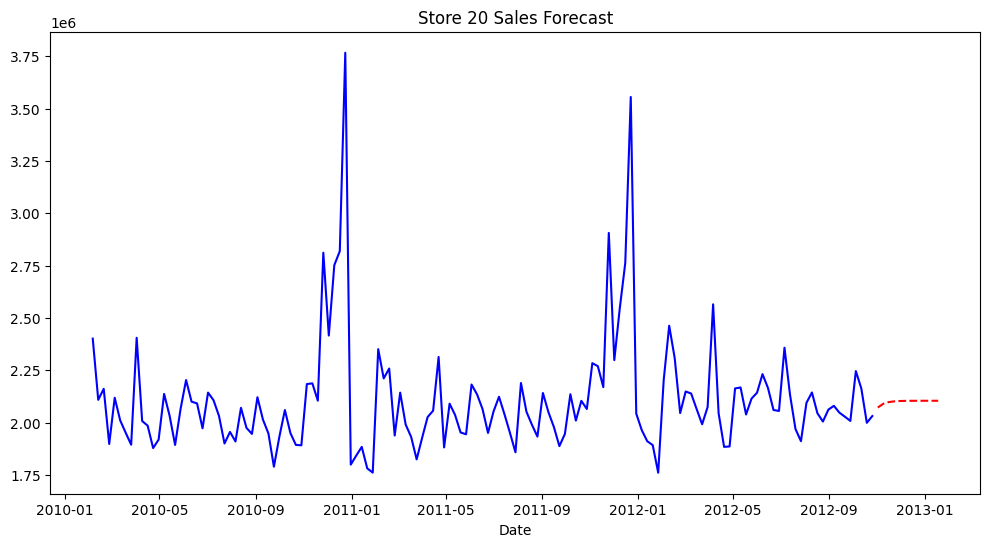

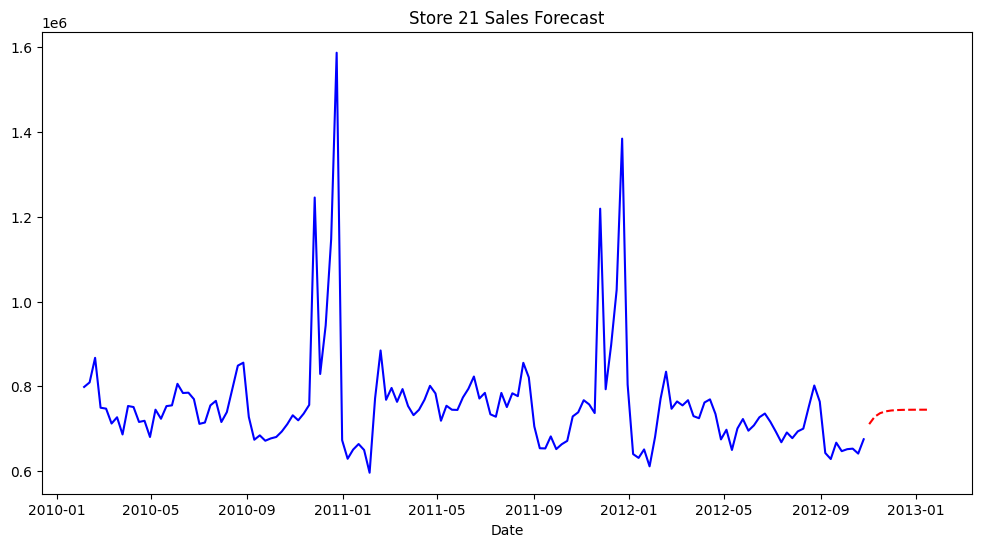

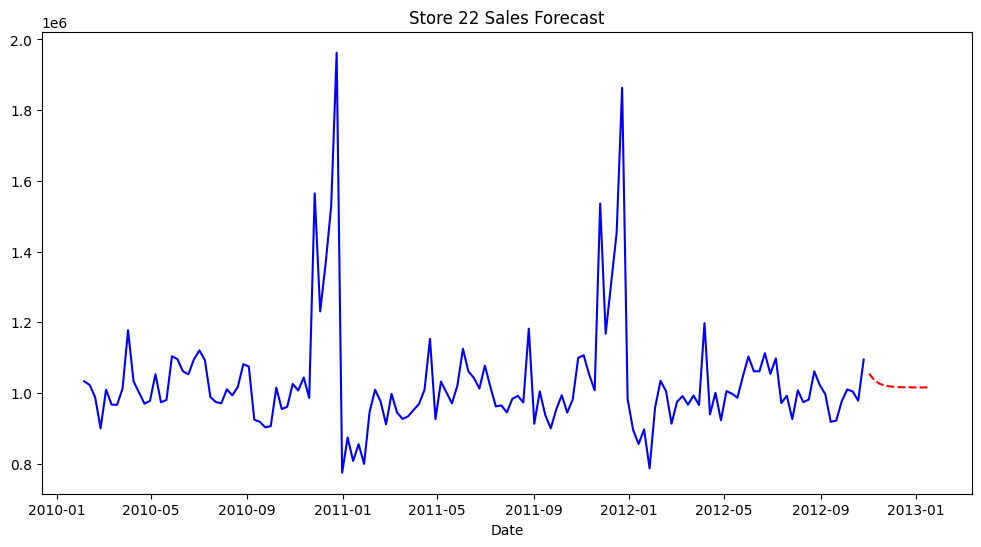

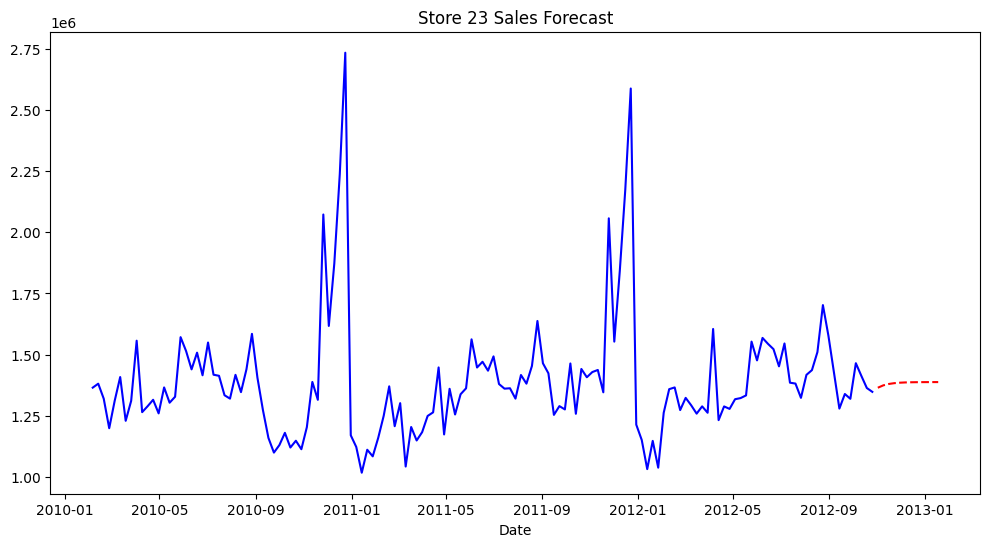

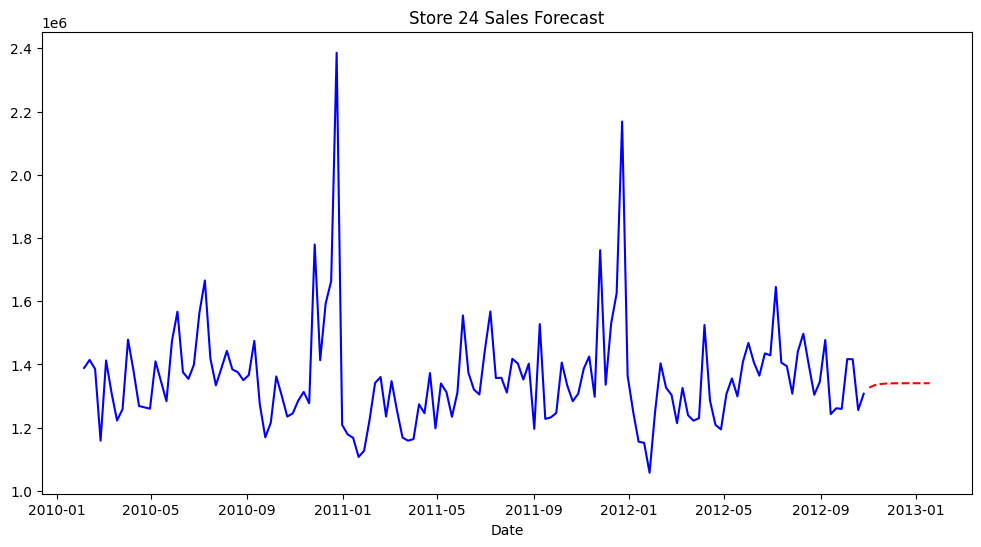

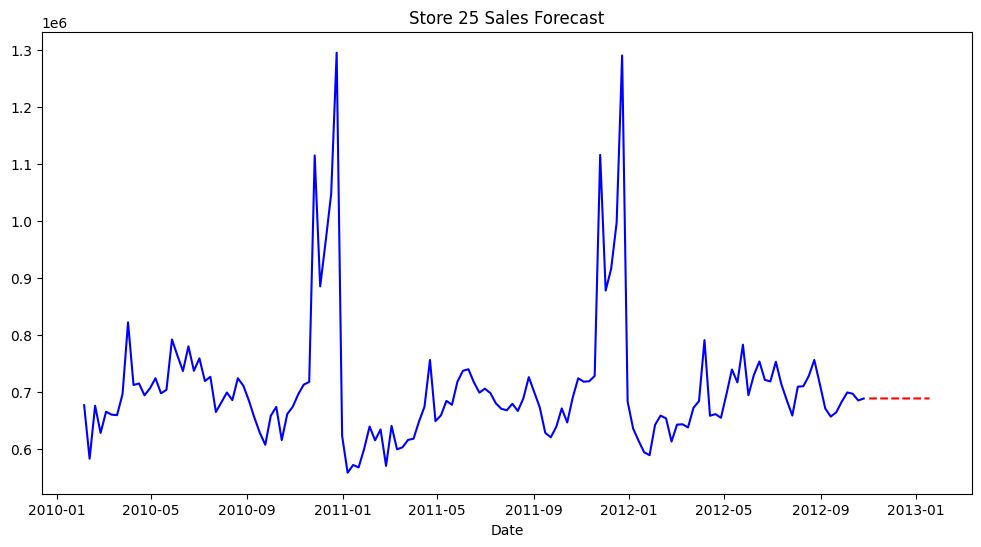

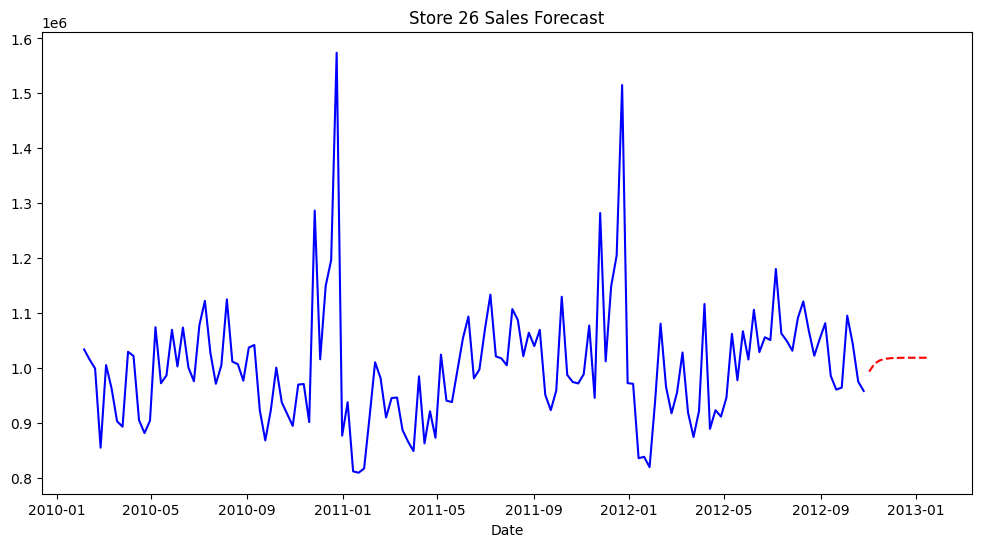

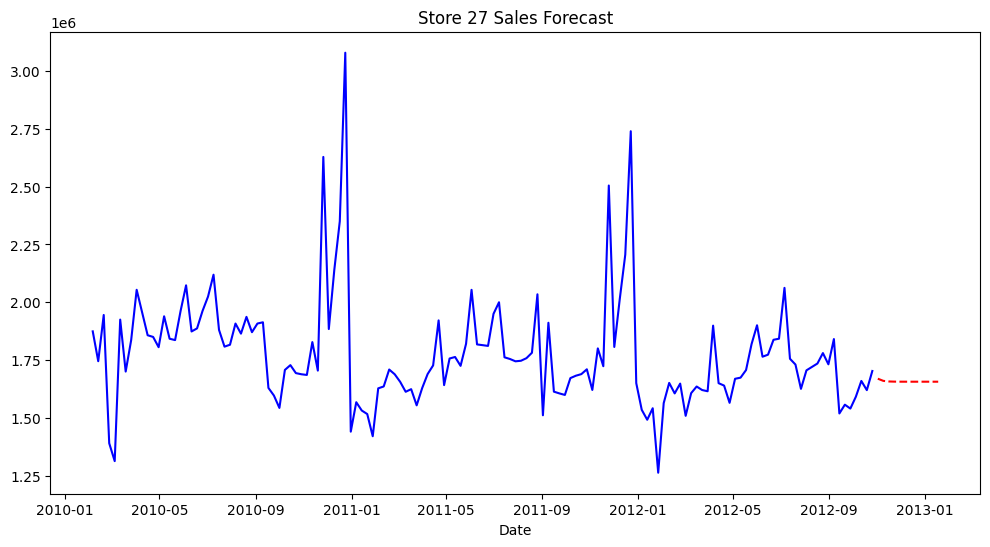

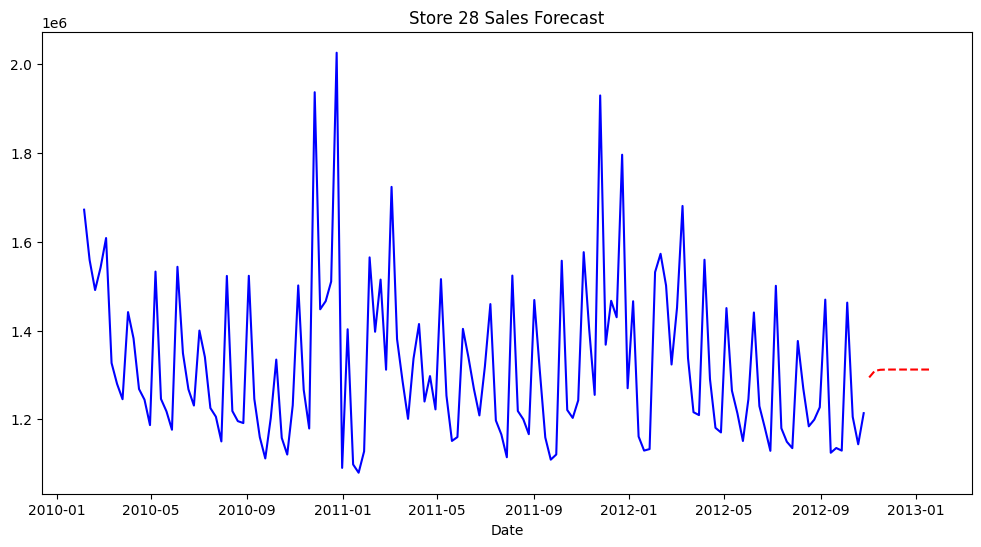

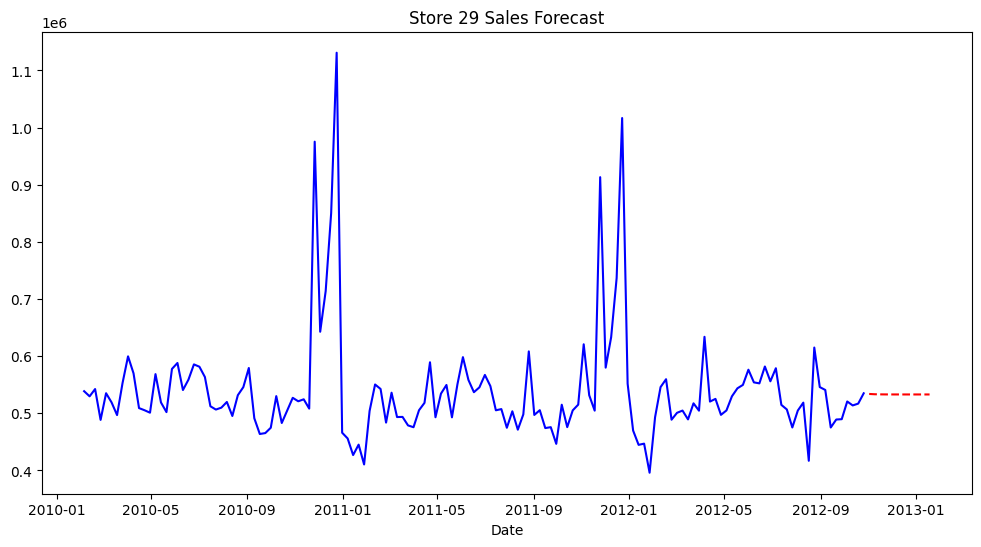

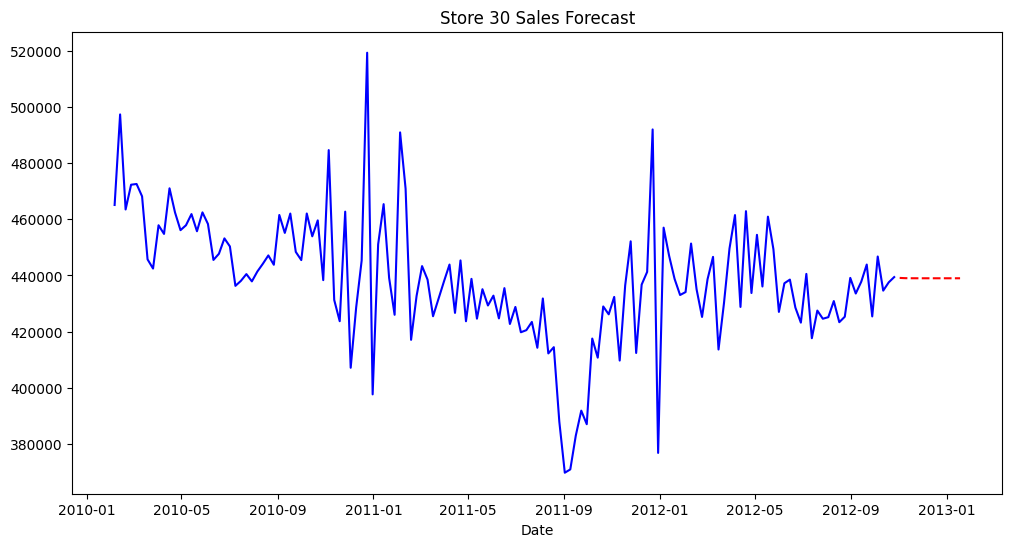

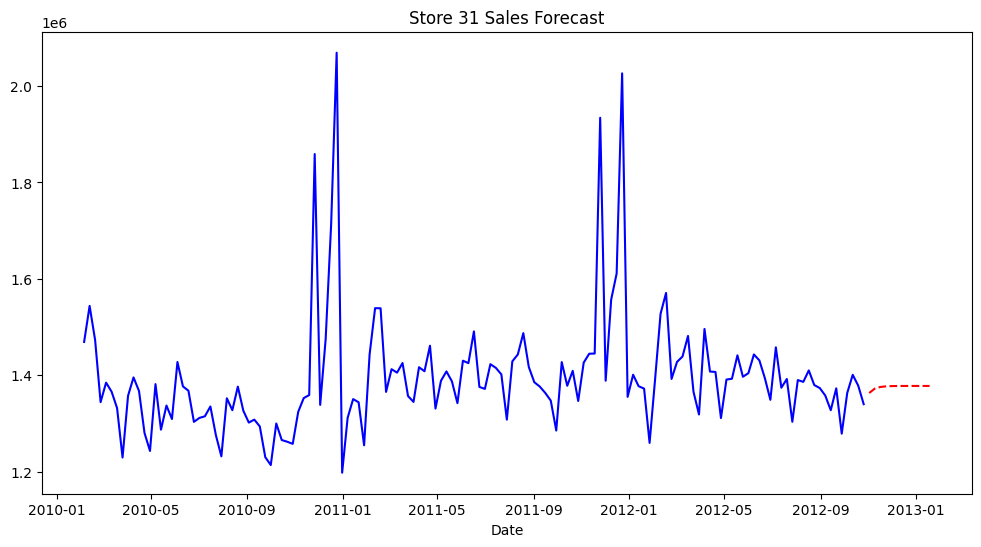

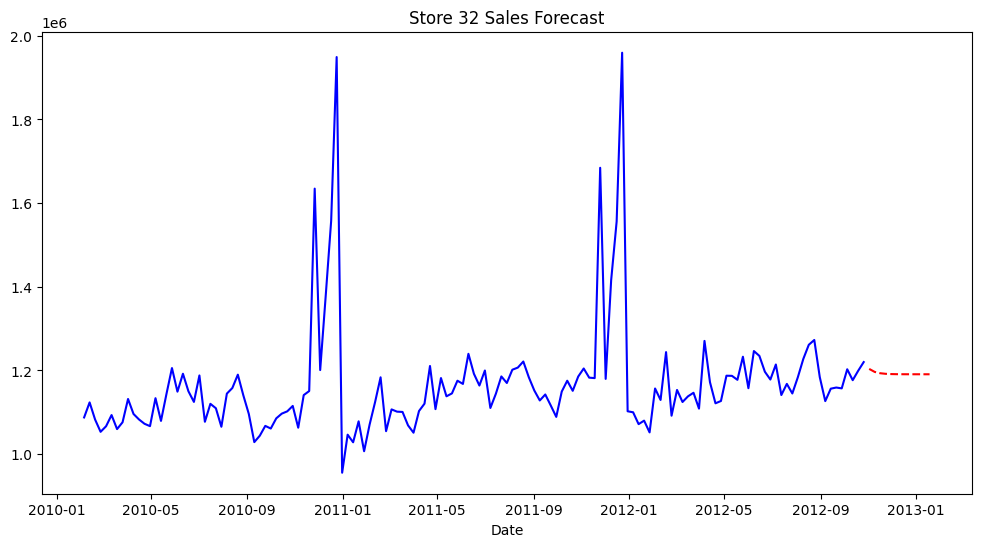

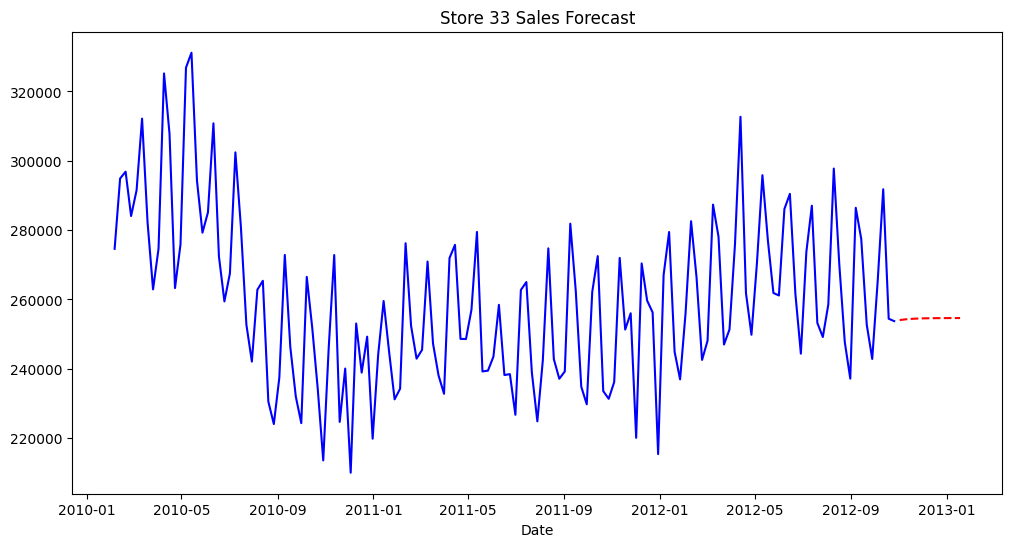

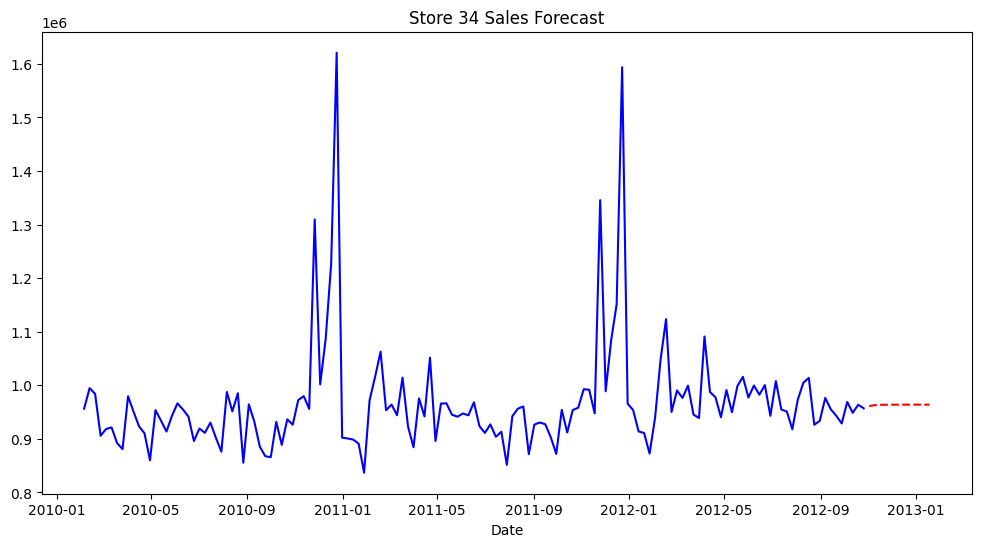

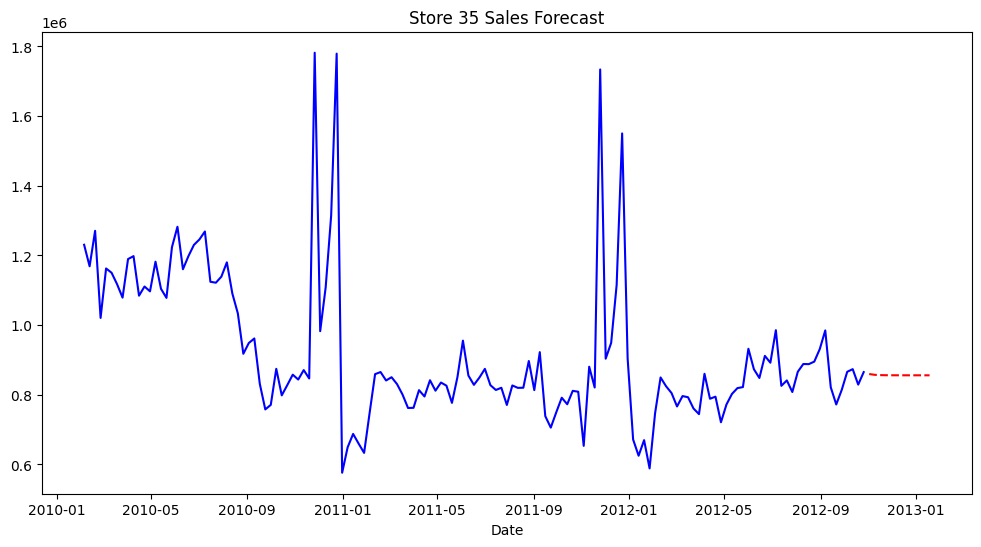

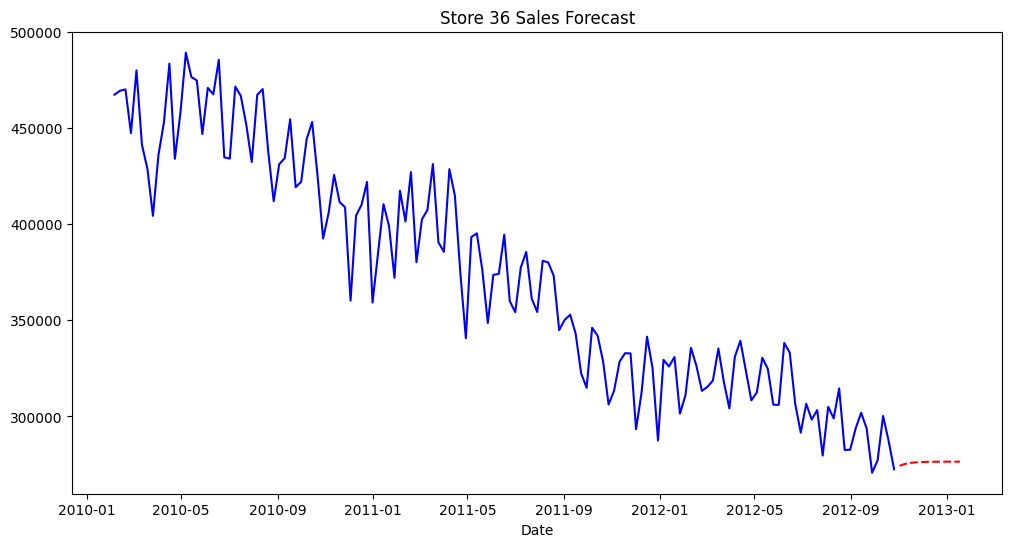

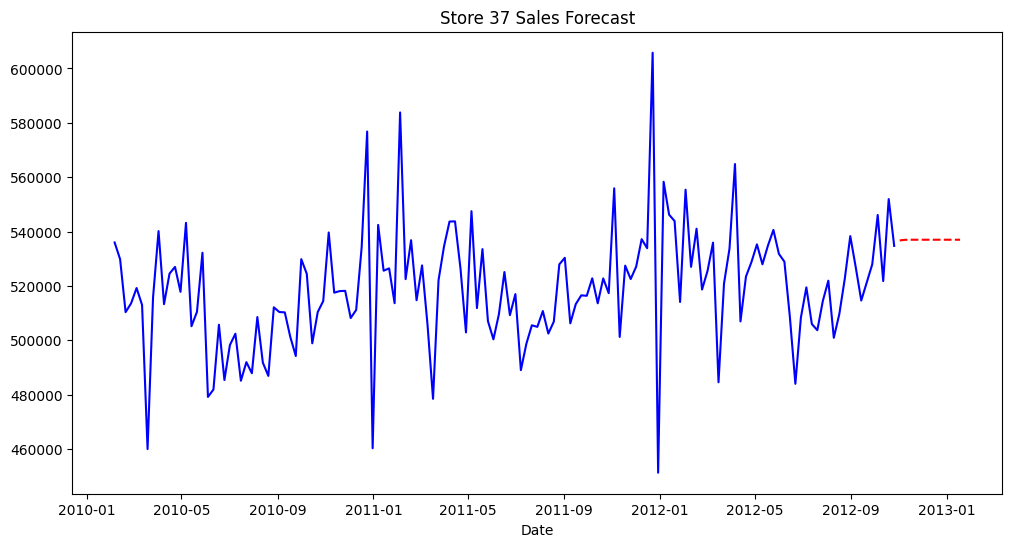

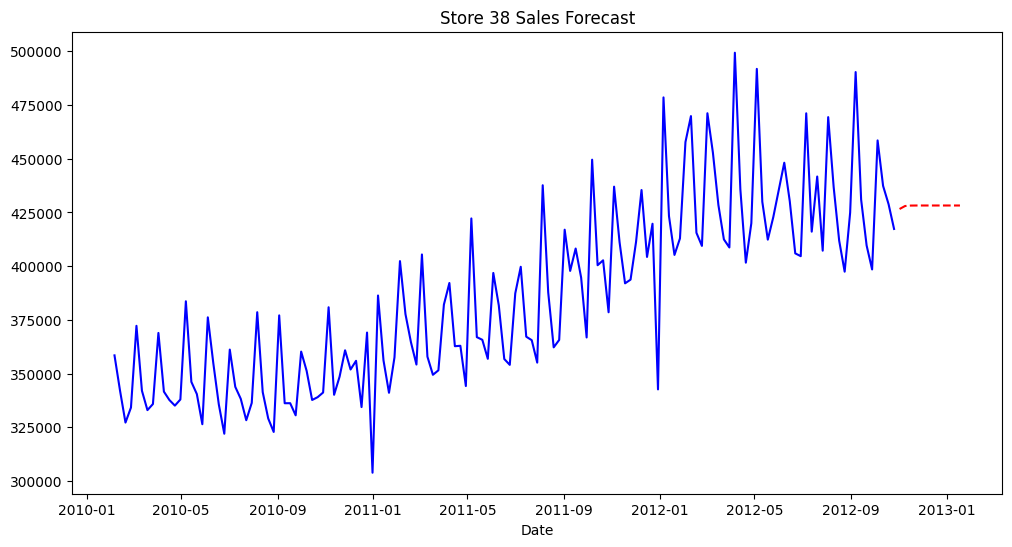

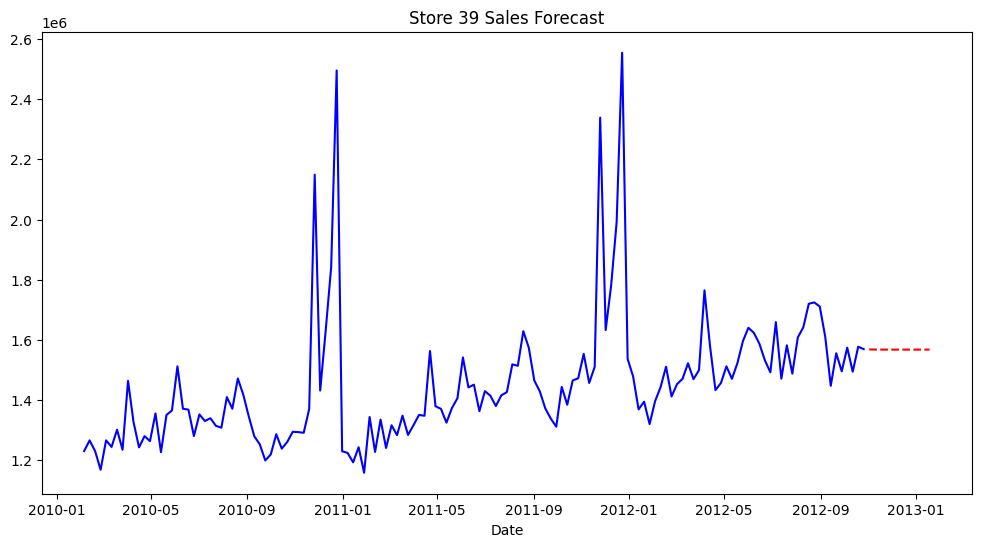

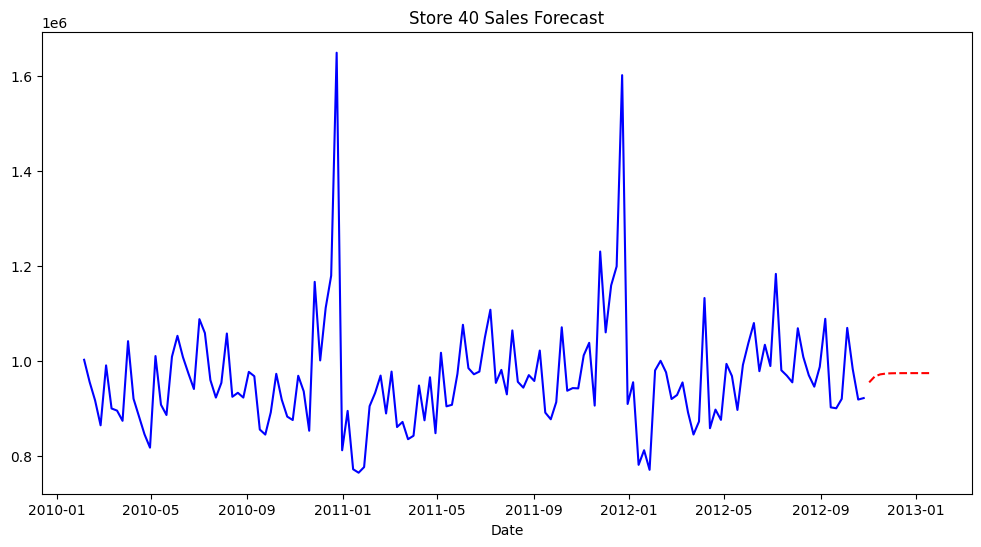

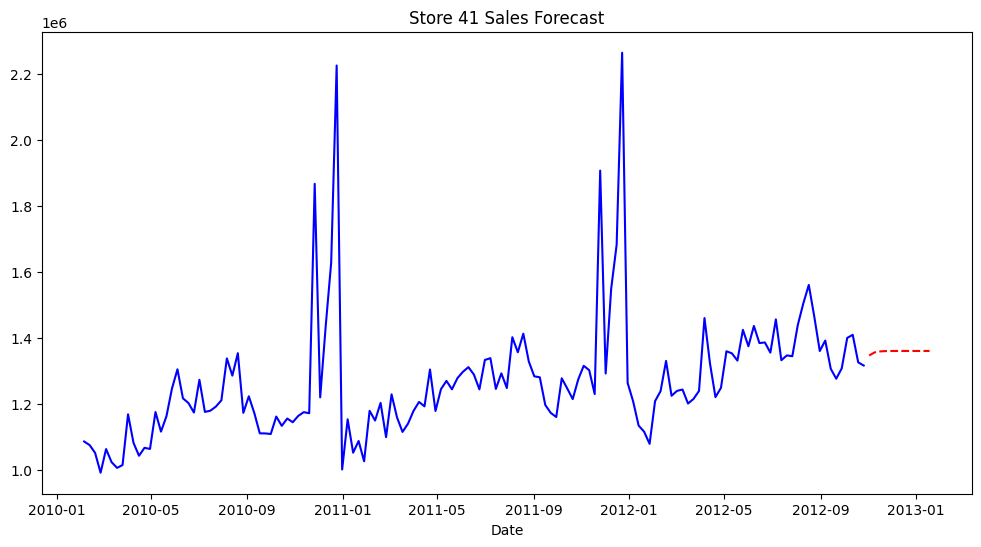

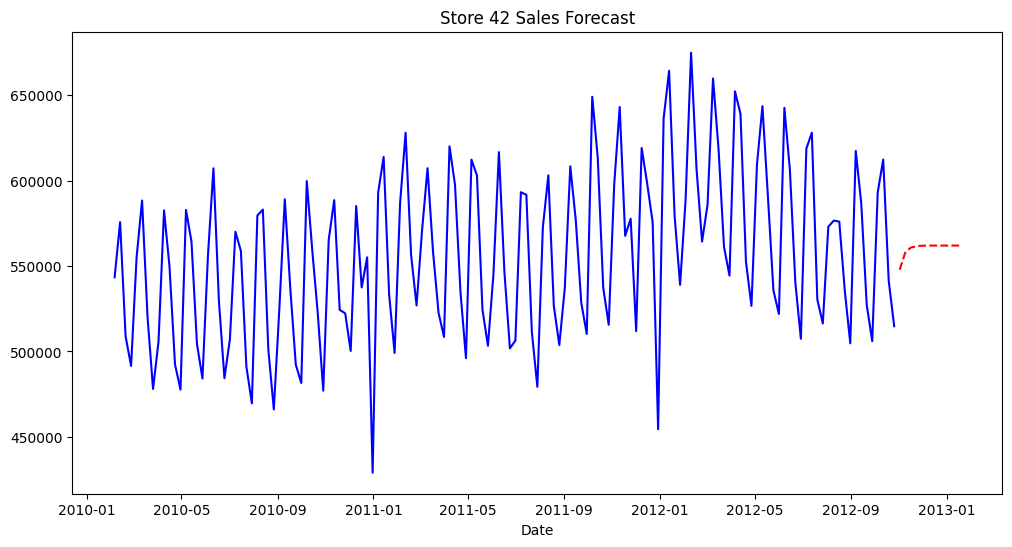

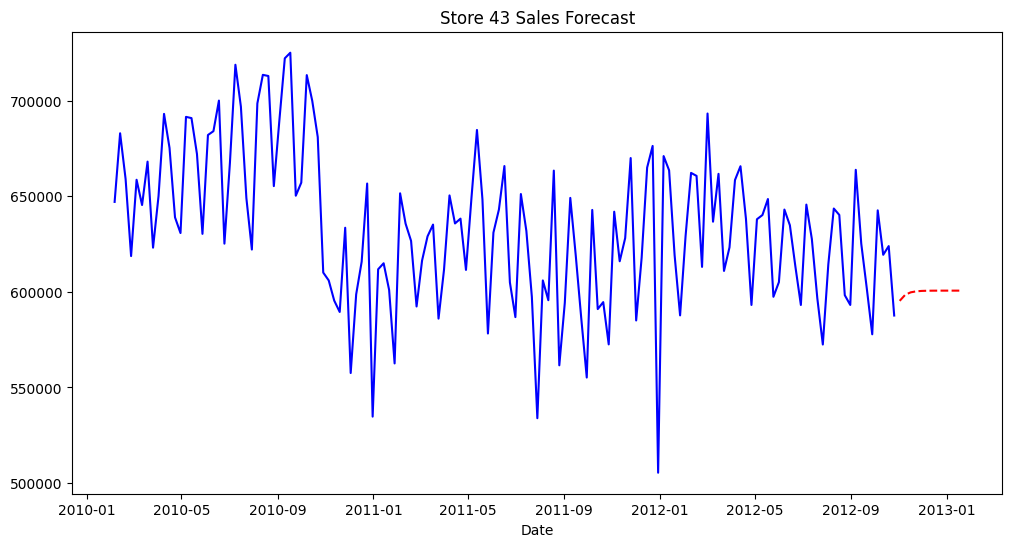

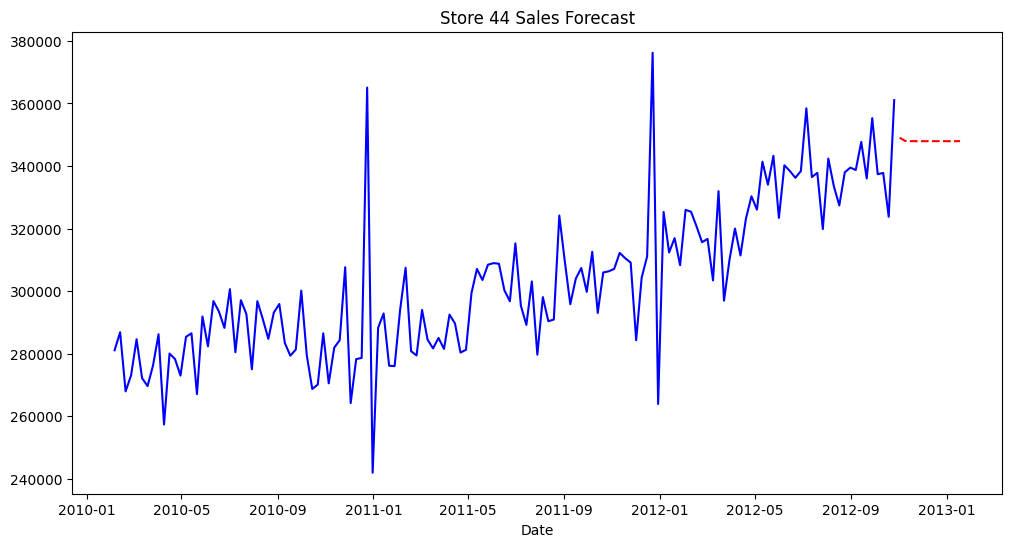

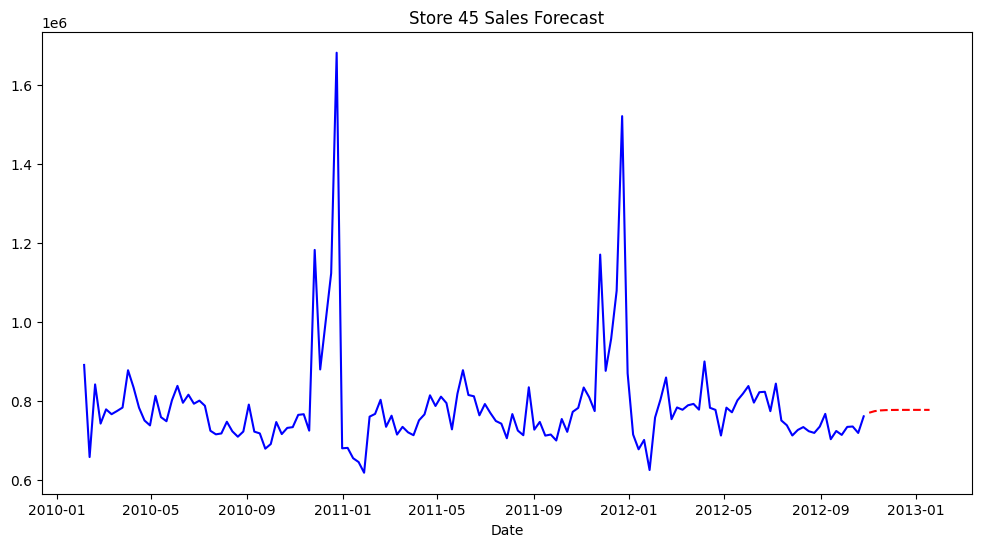

In [ ]:
#Visualize Forecasts
for store,forecast in forecasts.items():
  plt.figure(figsize=(12,6))
  plt.plot(store_sales[store].index,store_sales[store],label='Historical Sales',color='blue')
  plt.plot(forecast.index,forecast,label='Forecast',color='red',linestyle='--')
  plt.title(f'Store {store} Sales Forecast')
  plt.xlabel('Date')
  plt.show()